In [1]:
# Relevant libraries
import pandas as pd
import numpy as np

In [2]:
# Import and read data
pumpkins = pd.read_csv("../data/US-pumpkins.csv")

# Due to the inconsistency in weight of the pumpkins, select only entities with the 
# string 'bushel' in their package column
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1742,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [4]:
# Check if there is missing data in the current dataframe
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [5]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 70 to 1742
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        415 non-null    object 
 1   Type             9 non-null      object 
 2   Package          415 non-null    object 
 3   Variety          415 non-null    object 
 4   Sub Variety      248 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             415 non-null    object 
 7   Low Price        415 non-null    float64
 8   High Price       415 non-null    float64
 9   Mostly Low       391 non-null    float64
 10  Mostly High      391 non-null    float64
 11  Origin           415 non-null    object 
 12  Origin District  19 non-null     object 
 13  Item Size        301 non-null    object 
 14  Color            270 non-null    object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     11 non-null     object 
 17  Quality          0 

In [6]:
# Select a section of the dataframe that will be necessary for further study
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins_new = pumpkins[columns_to_select]

In [7]:
# Determine the average price of pumpkin using the Low and High Price columns
price = (pumpkins_new['Low Price'] + pumpkins_new['High Price']) / 2 

# Select the month from the date column
month = pd.DatetimeIndex(pumpkins_new['Date']).month
print(month)

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [8]:
# Create a new pumpkins dataframe and populate it with the required columns
new_pumpkins = pd.DataFrame({"Month": month, "Package": pumpkins_new['Package']})
new_pumpkins["Low Price"] = pumpkins_new['Low Price']
new_pumpkins["High Price"] = pumpkins_new['High Price']
new_pumpkins["Price"] = price

print(new_pumpkins)

      Month               Package  Low Price  High Price   Price
70        9  1 1/9 bushel cartons      15.00        15.0  15.000
71        9  1 1/9 bushel cartons      18.00        18.0  18.000
72       10  1 1/9 bushel cartons      18.00        18.0  18.000
73       10  1 1/9 bushel cartons      17.00        17.0  17.000
74       10  1 1/9 bushel cartons      15.00        15.0  15.000
...     ...                   ...        ...         ...     ...
1738      9    1/2 bushel cartons      15.00        15.0  15.000
1739      9    1/2 bushel cartons      13.75        15.0  14.375
1740      9    1/2 bushel cartons      10.75        15.0  12.875
1741      9    1/2 bushel cartons      12.00        12.0  12.000
1742      9    1/2 bushel cartons      12.00        12.0  12.000

[415 rows x 5 columns]


In [9]:
# Normalize to show the pricing per 1 bushel, not 1/2 or 1 1/9
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [10]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [11]:
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00
1742,9,1/2 bushel cartons,12.00,12.0,24.00


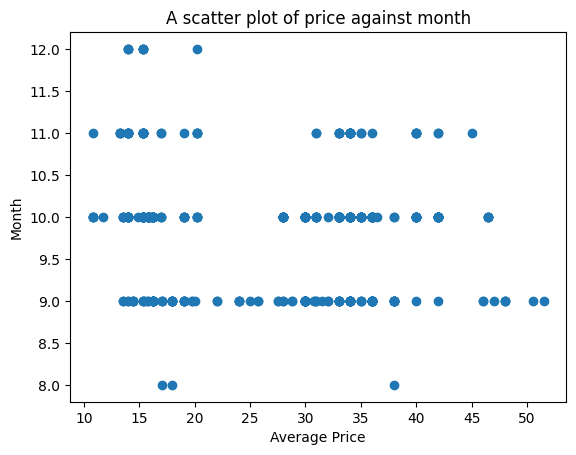

In [12]:
# Visualization
import matplotlib.pyplot as plt

# Get values to plot
price = new_pumpkins.Price
month = new_pumpkins.Month

# Show a scatter of price against month
plt.scatter(price, month)
plt.title("A scatter plot of price against month")
plt.xlabel("Average Price")
plt.ylabel("Month")
plt.show()

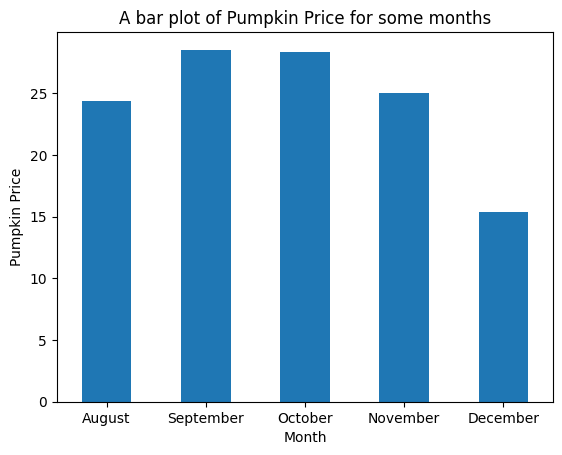

In [13]:
# Group the data by month and find the average price for each month
grouped_month = new_pumpkins.groupby('Month')['Price'].mean()

# Show a more useful plot: the bar plot
xlabels=['August', 'September', 'October', 'November', 'December']
grouped_month.plot.bar()
plt.title("A bar plot of Pumpkin Price for some months")
plt.ylabel("Pumpkin Price")
plt.xticks(ticks=np.arange(5), labels=xlabels, rotation=0)
plt.show()
